In [11]:
import numpy as np
import matplotlib.pyplot as plt
# import mkl

from numpy.typing import NDArray

np.random.seed(1234)
# mkl.set_num_threads(2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

## Utility functions

In [12]:
def append_ones(matrix, axis=1):
    ones = np.ones((matrix.shape[0], 1), dtype=matrix.dtype)
    return np.concatenate((matrix, ones), axis=axis)

## Feed-forward, activations and tiles

In [13]:
from typing import Callable


# one layer feed forward
def feed_forward(
    W: np.ndarray,
    dataset: np.ndarray,
    activation_fun: Callable[[np.ndarray], np.ndarray],
) -> np.ndarray:
    # raise Exception("Not implemented!")
    # X = append_ones(dataset)
    X = dataset
    return activation_fun(X @ W)

In [14]:
# sigmoid activation function
def sigmoid(matrix: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-matrix))

In [15]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples: NDArray) -> NDArray:
    rows, cols, h, w = examples.shape
    space = 2

    img_matrix = np.ones(shape=(rows * h + (rows - 1) * space, cols * w + (cols - 1) * space))

    for r in range(rows):
        for c in range(cols):
            x0 = r * w + r * space
            y0 = c * h + c * space
            img_matrix[x0 : x0 + w, y0 : y0 + w] = examples[r, c, :, :]

    return img_matrix

## Histogram of activations and filters plot

In [16]:
class Rbm:
    def __init__(self, visible_size, hidden_size, learning_rate):
        self.visible_size = visible_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.W = np.random.normal(scale=0.01, size=(visible_size+1, hidden_size+1)).astype(np.float32)
        self.W[:, -1] = 0.0
        self.W[-1, :] = 0.0

In [17]:
import pickle
import seaborn as sns
from mnists import MNIST

with open("./lab1_rbm.pickle.dat", "rb") as f:
    rbm: Rbm = pickle.load(f)

DATASET_SIZE = 512
DIGIT_SIZE = 28

mnist = MNIST()
mnist_dataset = mnist.test_images().astype(np.float32)

np.random.shuffle(mnist_dataset)

mnist_dataset = mnist_dataset[:DATASET_SIZE] / 255.0
mnist_dataset = mnist_dataset.reshape(DATASET_SIZE, DIGIT_SIZE * DIGIT_SIZE)
mnist_dataset = append_ones(mnist_dataset)

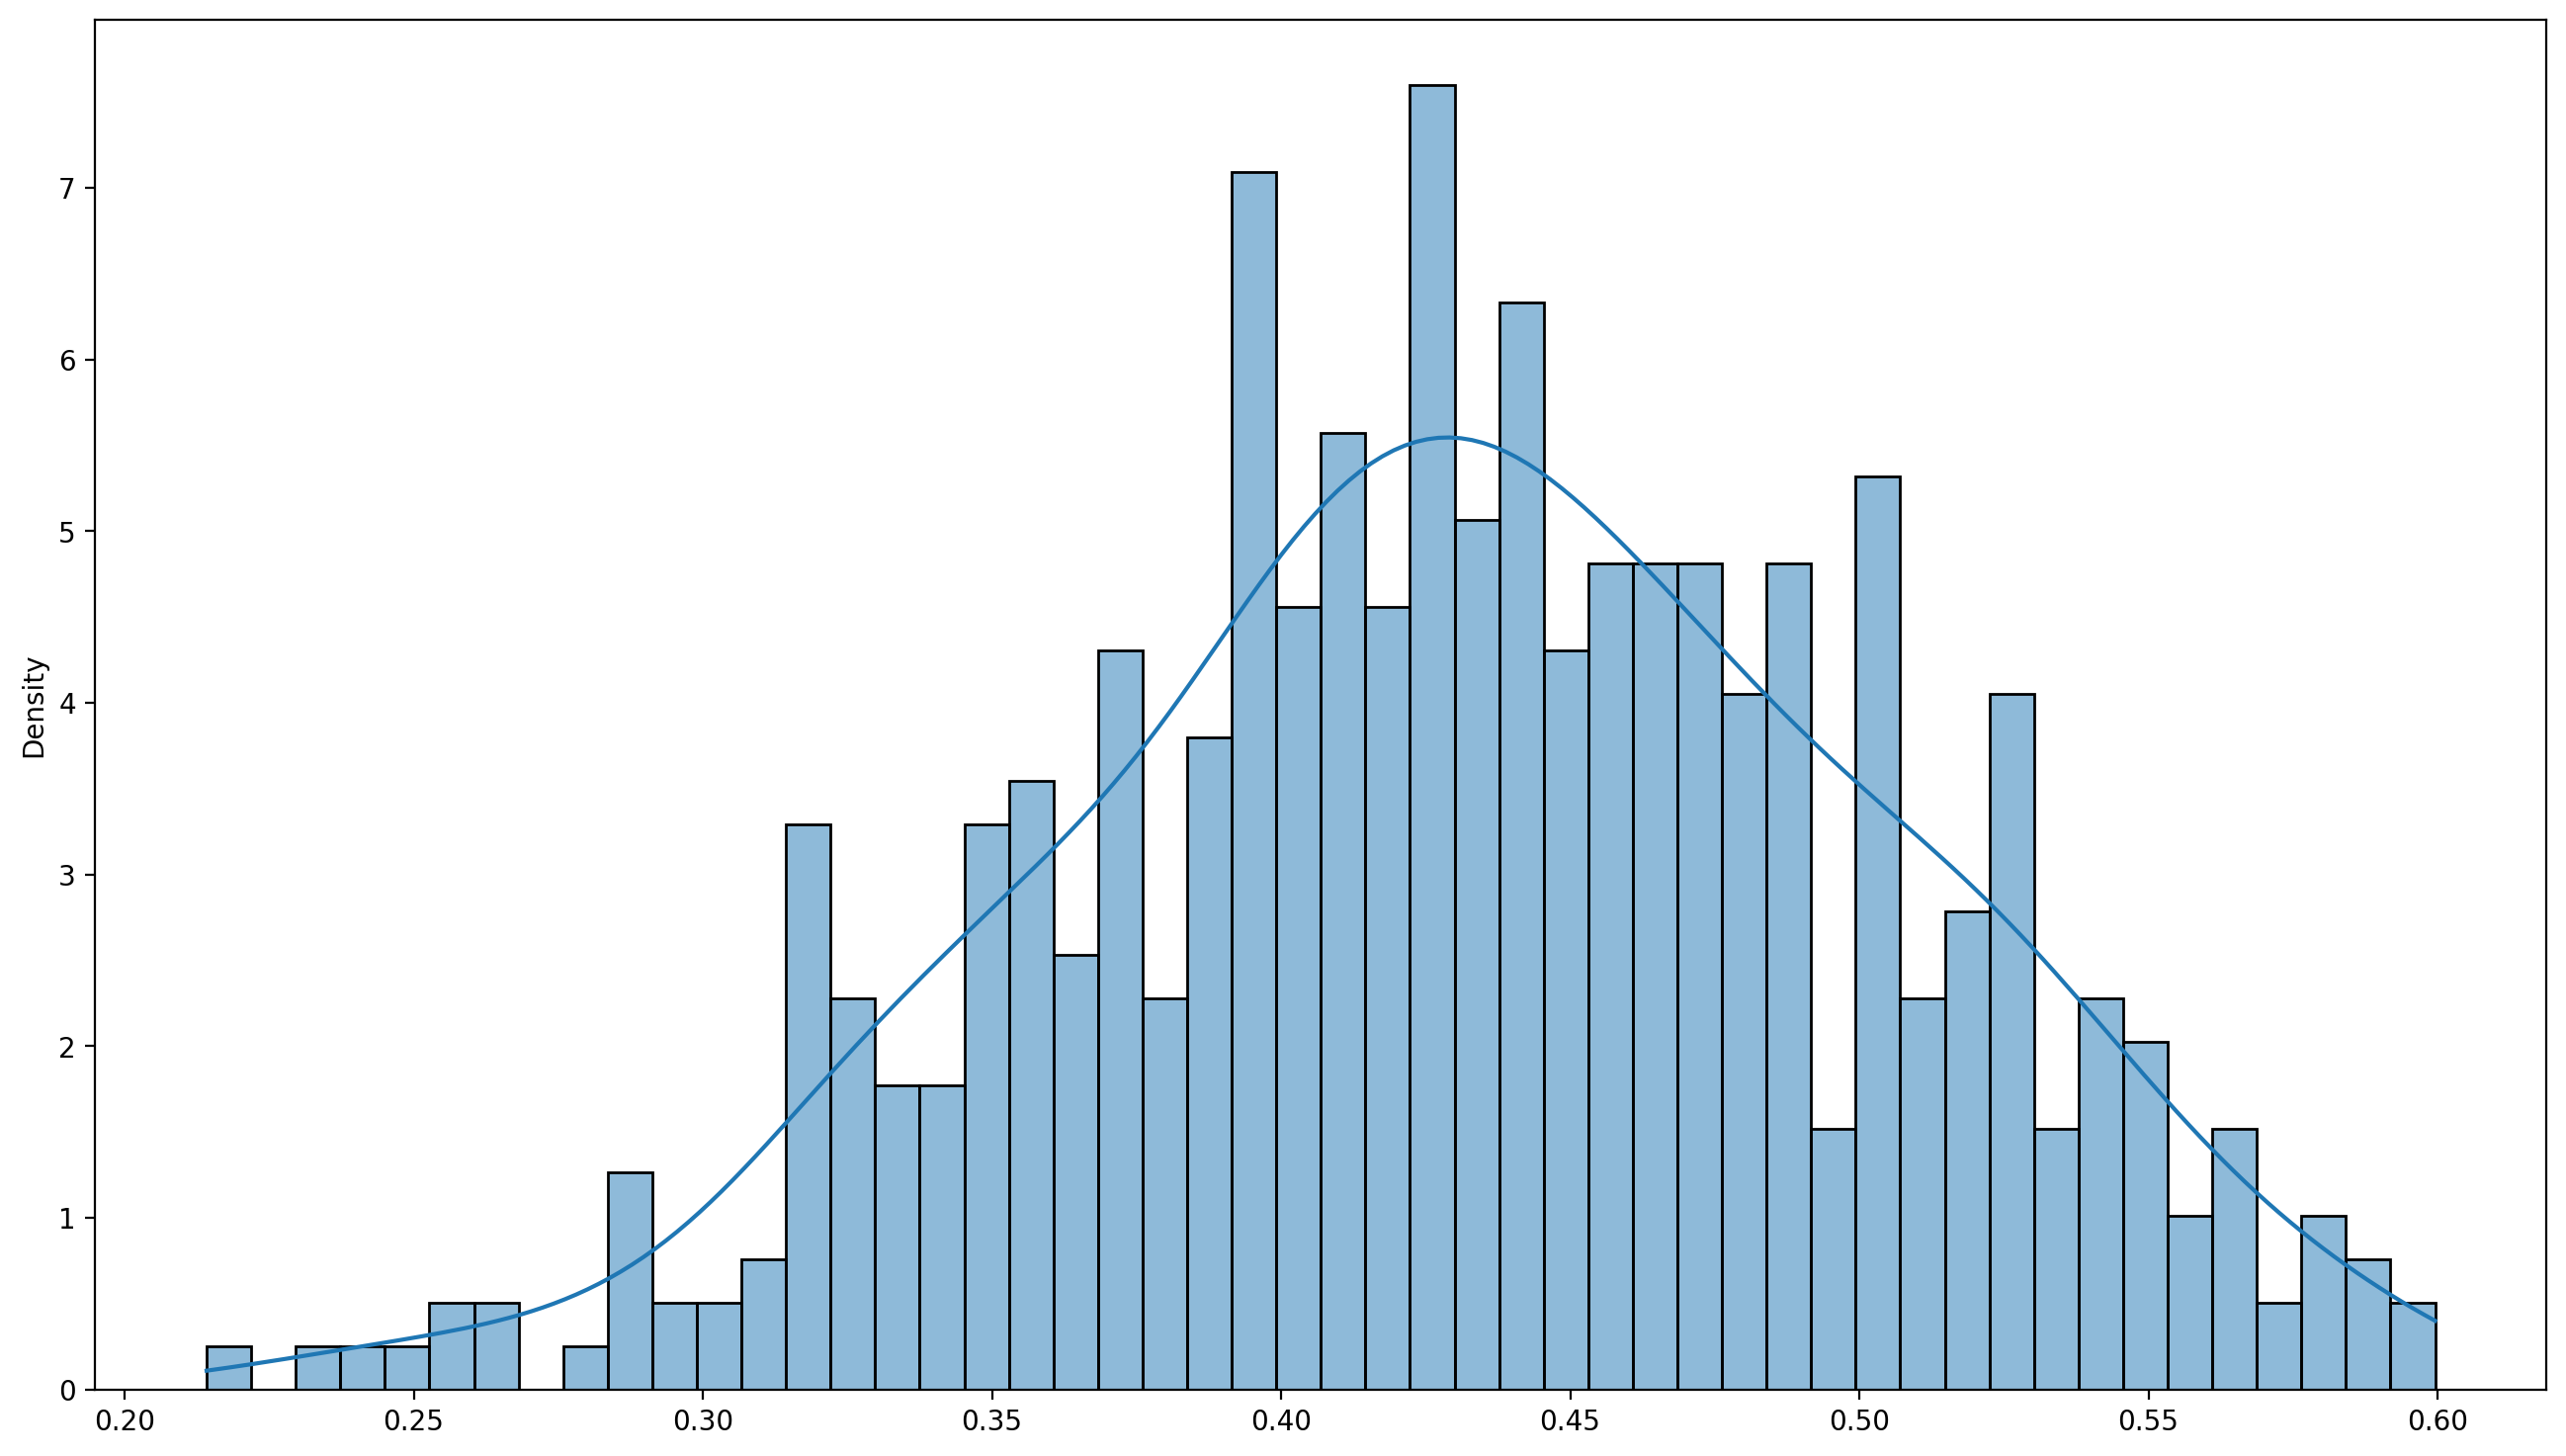

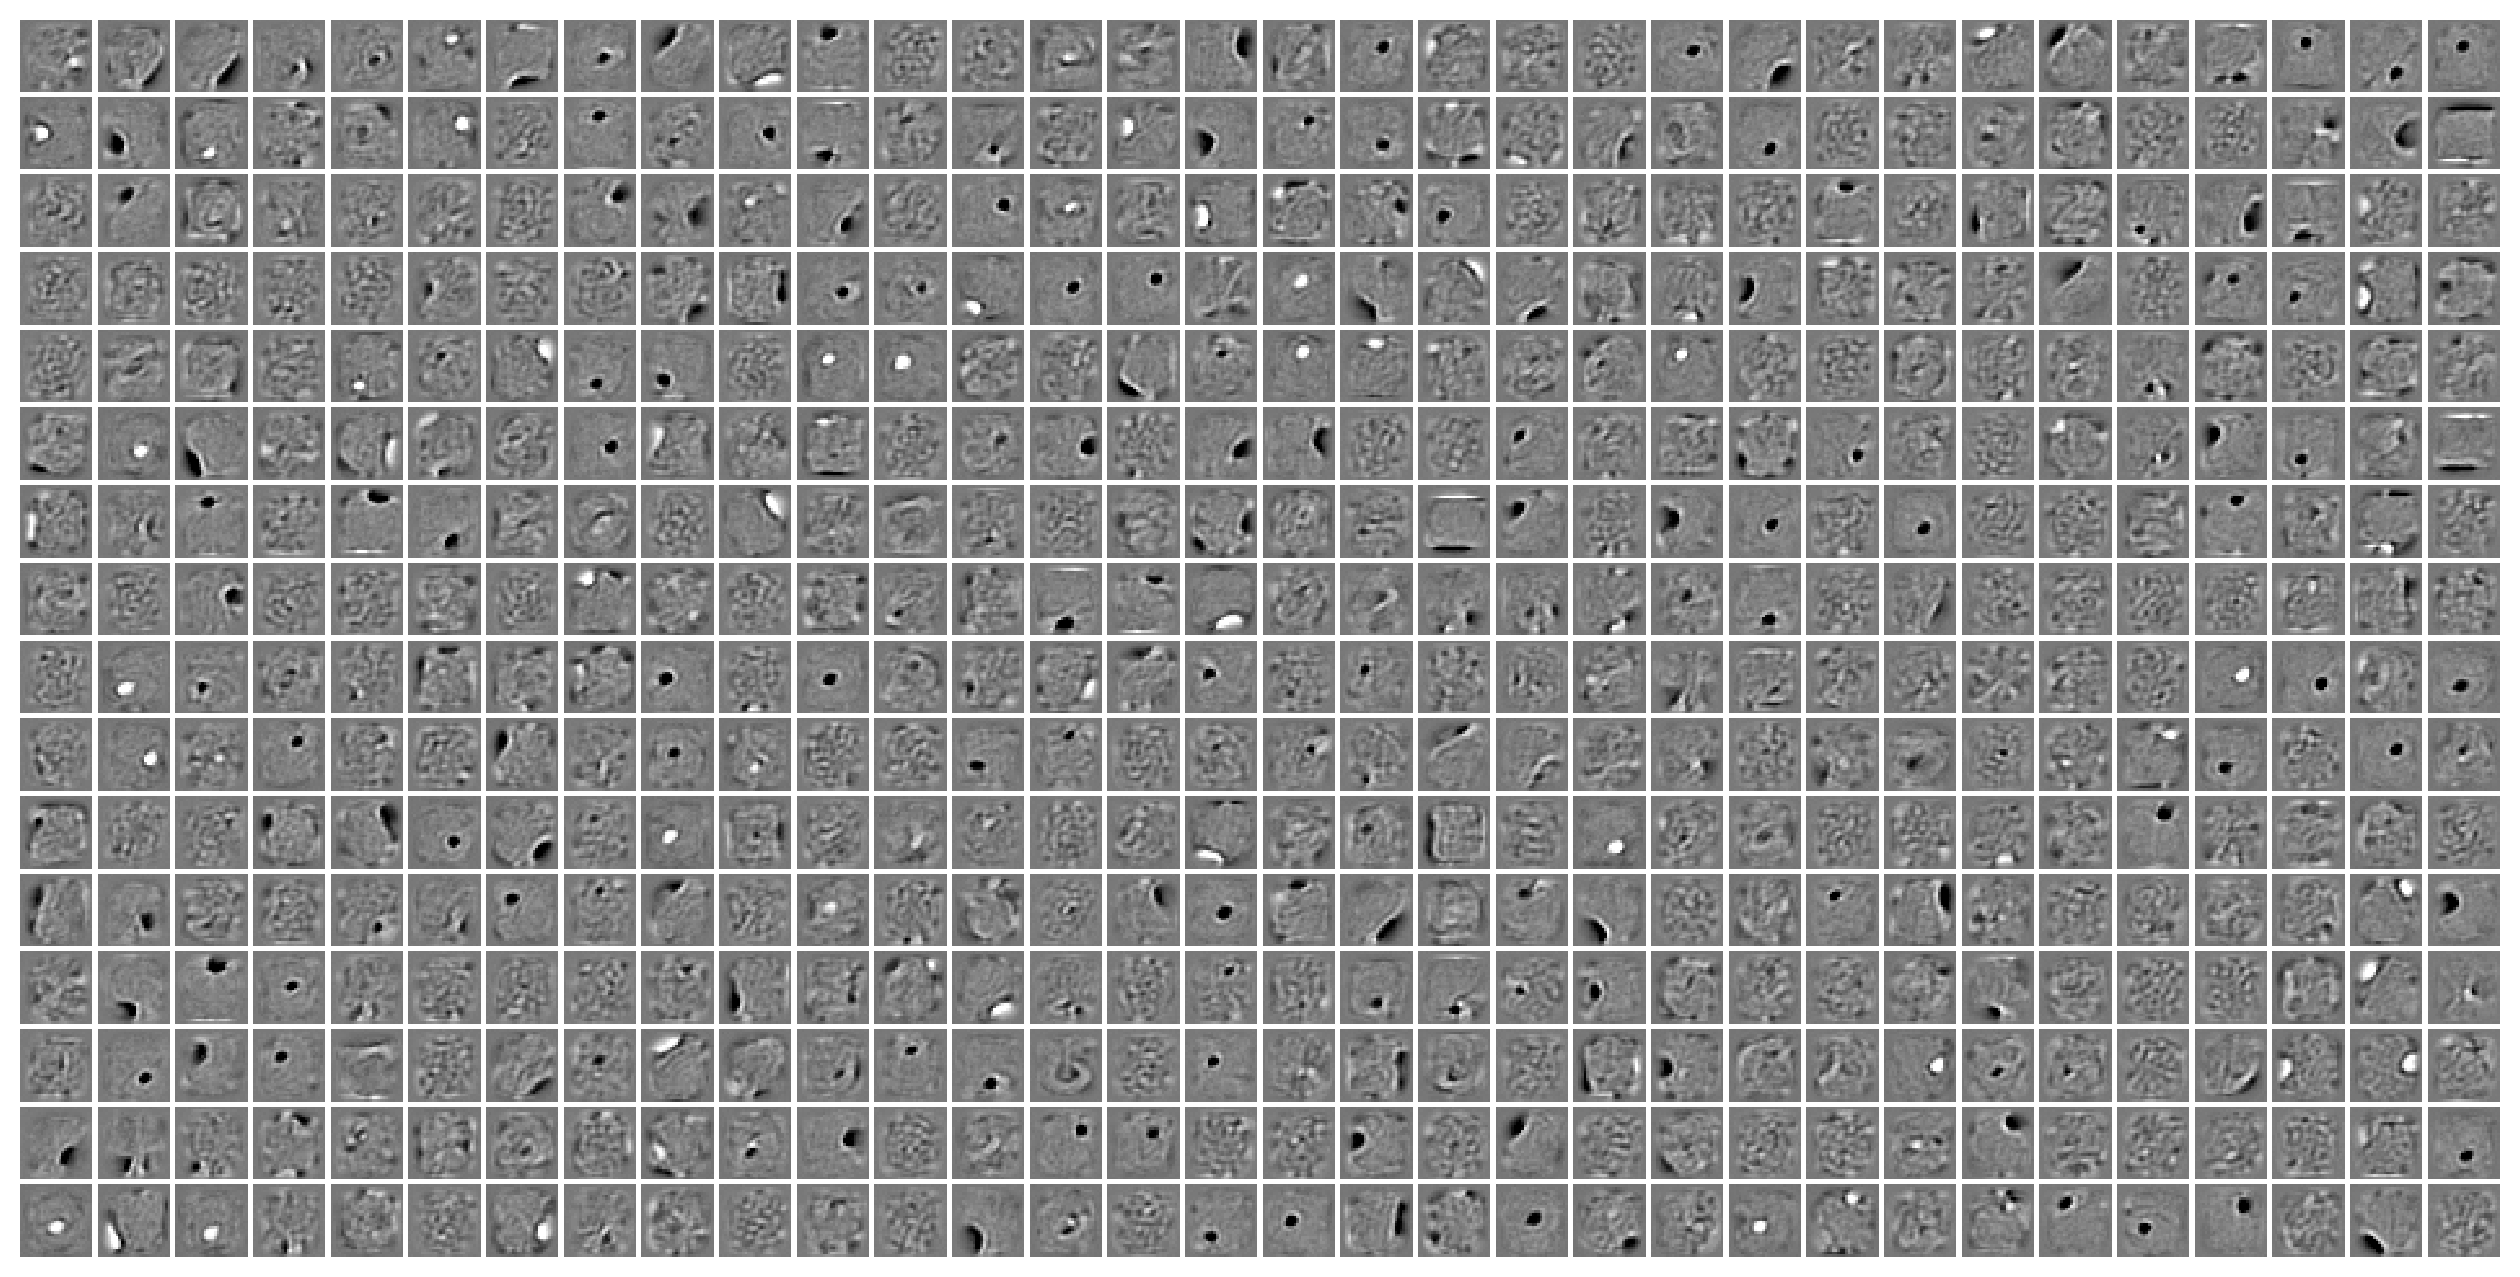

In [27]:
# Plotting mean hidden activations
activations = feed_forward(rbm.W, mnist_dataset, sigmoid)
mean_activations = np.mean(activations, 1)

sns.histplot(mean_activations, bins=50, kde=True, stat="density")

# Displaying RBM filetrs
filters = np.transpose(rbm.W)[:-1, :-1]
filters = filters.reshape(16, -1, 28, 28)
filters = np.clip(filters, -1.0, 1.0)

img = tiles(filters)
plt.matshow(img, cmap="gray", interpolation="none")
plt.axis("off")
plt.show()